In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Regresión Logistica").getOrCreate()

In [2]:
datos=spark.read.csv("titanic.csv",inferSchema=True,header=True)

In [3]:
datos.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [4]:
datos.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
misDatos=datos.select([
'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked'
])

In [6]:
misDatos.show()

+--------+------+------+----+-----+-----+-------+--------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+--------+------+------+----+-----+-----+-------+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|
|       1|     1|female|38.0|    1|    0|71.2833|       C|
|       1|     3|female|26.0|    0|    0|  7.925|       S|
|       1|     1|female|35.0|    1|    0|   53.1|       S|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|
|       0|     3|  male|null|    0|    0| 8.4583|       Q|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|
|       1|     3|female|27.0|    0|    2|11.1333|       S|
|       1|     2|female|14.0|    1|    0|30.0708|       C|
|       1|     3|female| 4.0|    1|    1|   16.7|       S|
|       1|     1|female|58.0|    0|    0|  26.55|       S|
|       0|     3|  male|20.0|    0|    0|   8.05|       S|
|       0|     3|  male|39.0|    1|    5| 31.275|       

In [7]:
misDatos.count()

891

In [8]:
datosFinales=misDatos.na.drop()

In [9]:
datosFinales.count()

712

In [10]:
datosFinales.show()

+--------+------+------+----+-----+-----+-------+--------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+--------+------+------+----+-----+-----+-------+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|
|       1|     1|female|38.0|    1|    0|71.2833|       C|
|       1|     3|female|26.0|    0|    0|  7.925|       S|
|       1|     1|female|35.0|    1|    0|   53.1|       S|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|
|       1|     3|female|27.0|    0|    2|11.1333|       S|
|       1|     2|female|14.0|    1|    0|30.0708|       C|
|       1|     3|female| 4.0|    1|    1|   16.7|       S|
|       1|     1|female|58.0|    0|    0|  26.55|       S|
|       0|     3|  male|20.0|    0|    0|   8.05|       S|
|       0|     3|  male|39.0|    1|    5| 31.275|       S|
|       0|     3|female|14.0|    0|    0| 7.8542|       

In [12]:
from pyspark.ml.feature import StringIndexer

In [13]:
generoIndexer=StringIndexer(inputCol="Sex",outputCol="indiceGenero")

In [14]:
generoIndexado=generoIndexer.fit(datosFinales).transform(datosFinales)

In [15]:
generoIndexado.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- indiceGenero: double (nullable = true)



In [16]:
generoIndexado.show()

+--------+------+------+----+-----+-----+-------+--------+------------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|indiceGenero|
+--------+------+------+----+-----+-----+-------+--------+------------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|         0.0|
|       1|     1|female|38.0|    1|    0|71.2833|       C|         1.0|
|       1|     3|female|26.0|    0|    0|  7.925|       S|         1.0|
|       1|     1|female|35.0|    1|    0|   53.1|       S|         1.0|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|         0.0|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|         0.0|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|         0.0|
|       1|     3|female|27.0|    0|    2|11.1333|       S|         1.0|
|       1|     2|female|14.0|    1|    0|30.0708|       C|         1.0|
|       1|     3|female| 4.0|    1|    1|   16.7|       S|         1.0|
|       1|     1|female|58.0|    0|    0|  26.55|       S|      

In [32]:
embarqueIndexer=StringIndexer(inputCol="Embarked",outputCol="indiceEmbarque")

In [33]:
embarqueIndexado=embarqueIndexer.fit(generoIndexado).transform(generoIndexado)

In [34]:
embarqueIndexado.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- indiceGenero: double (nullable = true)
 |-- indiceEmbarque: double (nullable = true)



In [35]:
embarqueIndexado.show()

+--------+------+------+----+-----+-----+-------+--------+------------+--------------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|indiceGenero|indiceEmbarque|
+--------+------+------+----+-----+-----+-------+--------+------------+--------------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|         0.0|           0.0|
|       1|     1|female|38.0|    1|    0|71.2833|       C|         1.0|           1.0|
|       1|     3|female|26.0|    0|    0|  7.925|       S|         1.0|           0.0|
|       1|     1|female|35.0|    1|    0|   53.1|       S|         1.0|           0.0|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|         0.0|           0.0|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|         0.0|           0.0|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|         0.0|           0.0|
|       1|     3|female|27.0|    0|    2|11.1333|       S|         1.0|           0.0|
|       1|     2|female|14.0|    1|    0|30

In [44]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [45]:
embarqueIndexado.columns

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'indiceGenero',
 'indiceEmbarque']

In [47]:
constructor=VectorAssembler(inputCols=[
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'indiceGenero',
 'indiceEmbarque'  
],outputCol="features")

In [48]:
salida=constructor.transform(embarqueIndexado)

In [49]:
salida.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- indiceGenero: double (nullable = true)
 |-- indiceEmbarque: double (nullable = true)
 |-- features: vector (nullable = true)



In [50]:
salida.head(2)

[Row(Survived=0, Pclass=3, Sex='male', Age=22.0, SibSp=1, Parch=0, Fare=7.25, Embarked='S', indiceGenero=0.0, indiceEmbarque=0.0, features=DenseVector([3.0, 22.0, 1.0, 0.0, 7.25, 0.0, 0.0])),
 Row(Survived=1, Pclass=1, Sex='female', Age=38.0, SibSp=1, Parch=0, Fare=71.2833, Embarked='C', indiceGenero=1.0, indiceEmbarque=1.0, features=DenseVector([1.0, 38.0, 1.0, 0.0, 71.2833, 1.0, 1.0]))]

In [51]:
datosEntrena,datosEvalua=salida.select("features","Survived").randomSplit([0.7,0.3])

In [54]:
datosEvalua.describe().show()

+-------+------------------+
|summary|          Survived|
+-------+------------------+
|  count|               213|
|   mean|0.4225352112676056|
| stddev|0.4951263941257613|
|    min|                 0|
|    max|                 1|
+-------+------------------+



In [55]:
from pyspark.ml.classification import LogisticRegression

In [56]:
reglogTitanic=LogisticRegression(labelCol="Survived")

In [57]:
modelo=reglogTitanic.fit(datosEntrena)

In [58]:
evaluacion=modelo.evaluate(datosEvalua)

In [59]:
evaluacion.areaUnderROC

0.865627822944896

In [61]:
evaluacion.predictions.select("Survived","prediction").show()

+--------+----------+
|Survived|prediction|
+--------+----------+
|       1|       0.0|
|       1|       1.0|
|       1|       1.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       1|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       1|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       1|       0.0|
|       0|       0.0|
|       0|       0.0|
+--------+----------+
only showing top 20 rows



In [ ]:

#nuevosdatos es un DataFrame 
prediccion=modelo.transform(nuevosDatos)

In [42]:
from pyspark.sql.functions import corr
embarqueIndexado.select(corr("Survived","Pclass")).show()

+----------------------+
|corr(Survived, Pclass)|
+----------------------+
|   -0.3564615884452385|
+----------------------+



Coeficiente de Pearson:
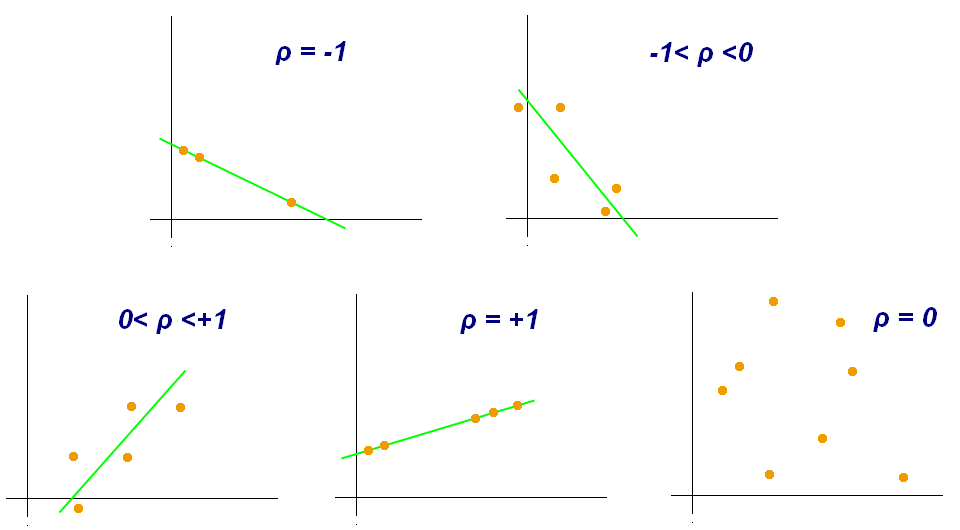